<a href="https://colab.research.google.com/github/benjaminbeilharz/Perception-Action-Notebooks/blob/main/1_Bayesian_Decision_Models_A_Primer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bayesian Decision Models: A Primer (Ma, 2019)

The aim of this tutorial is to get you thinking about the crucial steps for Bayesian Decision Models. The text and exercises are based of Section 3 of the paper (Ma, 2019) and W3D1 Bayesian Decisios from Neuromatch Academy 2021. 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import graphviz

# Warm Up: 

**1. Match the following functions that play a role in Bayesian modeling with the
descriptions:**

## FUNCTIONS
1. Distribution of the MAP (point with highest probability) estimate 
2. Prior distribution
3. Likelihood function
4. Posterior distribution
5. Measurement distribution


## DESCRIPTIONS
a. Product of inference on an individual trial \
b. Describes how observations are generated \
c. Can be directly compared to human responses in a psychophysical experiment \
d. Often modeled as a Gaussian shape centered at the measurement \
e. May reflect statistics in the natural world \


# Case 1: Unequal Likelihoods and Gestalt Laws 

You observe the five dots below all moving downward, as indicated by the arrows. \
![gestalt-law-graphic](https://drive.google.com/uc?export=view&id=1gvJMaT8Bcp2aOFwMfizk8A3AayEjdzcd) \

According to Gestalt psychology (Wertheimer, 1938), the mind has a tendency to group the dots together because of their common motion and perceive them as a single object. This is captured by the ‘‘Gestalt law of common fate.’’ Gestalt laws, however, are merely narrative summaries of phenomenology. A Bayesian model has the potential to provide a true explanation of the percept and, in some cases, make quantitative predictions (Wagemans et al., 2012). In this case, the Bayesian decision model takes the form of an ‘‘observer model’’ or ‘‘perception model.’’





## Step 1: Generative Model

We first formulate our generative model. The retinal image of each dot serves as a sensory observation. We will denote these five retinal images by I1, I2, I3, I4, and I5, each specifying the direction of movement of the corresponding dot’s image on the retina (up or down). For didactic purposes, let’s say that there exist only two scenarios in the world.


*   **Scenario 1:** all dots are part of the same object, and they therefore always move together. They move together either up or down, each with probability 0.5.
*   **Scenario 2:** each dot is an object by itself. Each dot independently moves either up or down, each with probability 0.5.


(Dots are only allowed to move up and down, and speed and position do not play a role in this problem.) The world state s from Section 2 is now a binary scenario.


**Task 1:** The generative model diagram in Figure 2 shows each scenario in a big box. Inside each box, the bubbles contain the variables and the arrows represent dependencies between variables. In other words, an arrow can be understood to represent the influence of one variable on another; it can be read as ‘‘produces’’ or ‘‘generates’’ or ‘‘gives rise to.’’ The sensory observations should always be at the bottom of the diagram. 

**Put the following variable names in the correct boxes: retinal images I1 , I2 , I3 , I4 , and I5 and motion directions s (a single motion direction), s1 , s2 , s3 , s4 , and s5 . The same variable might appear more than once.**



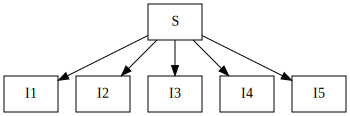

In [33]:
import graphviz

scenario1 = graphviz.Digraph(comment='Scenario 1')

#put the correct name in the label argument 
scenario1.node('A', label = 'S', shape = 'rect')
scenario1.node('B', label = 'I1', shape = 'rect')
scenario1.node('C', label = 'I2', shape = 'rect')
scenario1.node('D', label = 'I3', shape = 'rect')
scenario1.node('E', label = 'I4', shape = 'rect')
scenario1.node('F', label = 'I5', shape = 'rect')
scenario1.edges(['AB', 'AC', 'AD', 'AE', 'AF'])
scenario1 

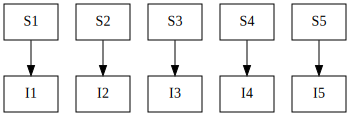

In [34]:
scenario2 = graphviz.Digraph(comment='Scenario 1')

#put the correct name in the label argument 
scenario2.node('A', label = 'S1', shape = 'rect')
scenario2.node('B', label = 'S2', shape = 'rect')
scenario2.node('C', label = 'S3', shape = 'rect')
scenario2.node('D', label = 'S4', shape = 'rect')
scenario2.node('E', label = 'S5', shape = 'rect')

scenario2.node('F', label = 'I1', shape = 'rect')
scenario2.node('G', label = 'I2', shape = 'rect')
scenario2.node('H', label = 'I3', shape = 'rect')
scenario2.node('I', label = 'I4', shape = 'rect')
scenario2.node('J', label = 'I5', shape = 'rect')

scenario2.edges(['AF', 'BG', 'CH', 'DI', 'EJ'])
scenario2

## Step 2 Inference 

In inference, the two scenarios become hypothesized scenarios. Inference involves likelihoods and priors. The likelihood of a scenario is the probability of the sensory observations under the scenario.

**Task 2:**

1. **What is the likelihood of scenario 1?**
2. **What is the likelihood of scenario 2?**
3. **Do the likelihoods of the scenarios sum to 1? Explain why
or why not.**
4. **What is wrong with the phrase ‘‘the likelihood of the
observations’’?**

Note: Take the probabilities from the description of the two scenarios above to compute your answers.


In [35]:
likelihood_scenario_1 = 1/5
likelihood_scenario_2 = .5**5

'''
Do the likelihoods of the scenarios sum to 1? Explain why or why not

(answer here)


''';



'''
What is wrong with the phrase likelihoods of the observations?

(answer here)


''';

**Task 3a:**

Let’s say scenario 1 occurs twice as often in the world as scenario 2. The observer can use these frequencies of occurrence as prior probabilities, reflecting expectations in the absence of specific sensory observations.


1. **What are the prior probabilities of scenarios 1 and 2?**
2. **What is the product of the likelihood and the prior probability for scenario 1?**
3. **What is this product for scenario 2?**
4. **Do these products of the scenarios sum to 1?**
5. **Posterior probabilities have to sum to 1. To achieve that,
divide each of the products above by their sum. Calculate the posterior probabilities of scenarios 1 and 2. You have just applied Bayes’ rule.**



In [36]:
prior_scenario_1 =  2/3
prior_scenario_2 =  1/3

product_likelihood_prior_scenario_1 = prior_scenario_1 * likelihood_scenario_1
product_likelihood_prior_scenario_2 = prior_scenario_2 * likelihood_scenario_2
s_posterior = product_likelihood_prior_scenario_1 + product_likelihood_prior_scenario_2
#Do these producs of the scenario sum to one?

# p(Scenario_1 | I1, ...., I5)
posterior_scenario_1 = product_likelihood_prior_scenario_1 / s_posterior

# p(Scenario_1 | I1, ...., I5)
posterior_scenario_2 = product_likelihood_prior_scenario_2 / s_posterior

The default Bayesian perception model for discrete hypotheses holds that the percept is the scenario with the high- est posterior probability (maximum-a-posteriori or MAP estimation).

**Task 3b:**

1. **Would that be consistent with the law of common fate? Explain.**
2. **How does this Bayesian observer model complement—or go beyond—the traditional Gestalt account of this phenomenon?**


In [ ]:
'''
Would that be consistent with the law of common fate? Explain.

(answer here)


'''

'''
How does this Bayesian observer model complement—or go beyond—the traditional Gestalt account of this phenomenon?

(answer here)

'''

'\nHow does this Bayesian observer model complement—or go beyond—the traditional Gestalt account of this phenomenon?\n\n(answer here)\n\n'

# Case 2: Competing likelihoods and priors in motion sickness

Michel Treisman has tried to explain motion sickness in the context of evolution (Treisman, 1977). During the millions of years over which the human brain evolved, accidentally eating toxic food was a real possibility, and that could cause hallucina- tions. Perhaps, our modern brain still uses prior probabilities passed on from those days; those would not be based on our personal experience, but on our ancestors’! This is a fascinating, though only weakly tested, theory. Here, we don’t delve into the merits of the theory but try to cast it in Bayesian form.

Suppose you are in the windowless room on a ship at sea. Your brain has two sets of sensory observations: *visual observations* and *vestibular observations*. 

Let’s say that the brain considers three scenarios for what caused these observations:

* Scenario 1: the *room is not moving* and *your motion* in the room causes both sets of observations.
* Scenario 2: *your motion* in the room causes your *visual observations*, whereas your motion in the room and the *room’s motion* in the world together cause the vestibular observations.
* Scenario 3: you are hallucinating; your motion in the room and *ingested toxins* together cause both sets of observations.


## Step 1: Generative Model
**Task 4:** \
**Draw a diagram of the generative model. It should contain one box for each scenario, and all of the italicized variables in the previous paragraph. Some variables might appear more than once.**

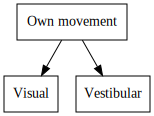

In [4]:
scenario1 = graphviz.Digraph(comment='Scenario 1: The room is not moving and your motion in the room causes both sets of observations.')

#specify nodes
scenario1.node('A', label = 'Own movement', shape = 'rect')
scenario1.node('B', label = 'Visual', shape = 'rect')
scenario1.node('C', label='Vestibular', shape='rect')

#specify edges 
scenario1.edges(['AB', 'AC'])

scenario1

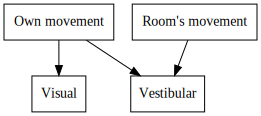

In [8]:
scenario2 = graphviz.Digraph(comment='Scenario 2: Your motion in the room causes your visual observations, whereas your motion in the room and the room’s motion in the world together cause the vestibular observations.')

#specify nodes
scenario2.node('A', label = 'Own movement', shape = 'rect')
scenario2.node('B', label = 'Room\'s movement', shape = 'rect')
scenario2.node('C', label = 'Visual', shape = 'rect')
scenario2.node('D', label = 'Vestibular', shape = 'rect')

#specify edges 
scenario2.edges(['AC', 'AD', 'BD'])

scenario2 

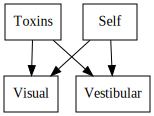

In [10]:
scenario3 = graphviz.Digraph(comment='Scenario 3: You are hallucinating; your motion in the room and ingested toxins together cause both sets of observations.')

#specify nodes
scenario3.node('A', label = 'Toxins', shape = 'rect')
scenario3.node('D', label='Self', shape='rect')
scenario3.node('B', label = 'Visual', shape = 'rect')
scenario3.node('C', label = 'Vestibular', shape = 'rect')

#specify edges 
scenario3.edges(['AB', 'AC', 'DB', 'DC'])

scenario3

## Scenario 2: Inference

In this exercise use numbers to illustrate the inference.
Try to figure out from the text, which scenarios are more or less probable (apriori, likelihood). In the end you want to have posterior to make a statement about which scenario is most probable.

**Task 5:**

1. **In prehistory, people would, of course, move around in the world, but surroundings would almost never move. Once in a while, a person might accidentally ingest toxins. Assuming that your innate prior probabilities are based on these prehistoric frequencies of events, draw a bar diagram to represent your prior probabilities of the three scenarios above.**

2. **In the windowless room on the ship, there is a big discrepancy between your visual and vestibular observations. Draw a bar diagram that illustrates the likeli- hoods of the three scenarios in that situation (i.e., how probable these particular sensory observations are under each scenario).**

3. **Draw a bar diagram that illustrates the posterior probabil- ities of the three scenarios.**

4. **Using the posterior probabilities, explain why you might
vomit in this situation.** 


'\nUsing the posterior probabilities, explain why you might vomit in this situation.\n\n(answer here)\n\n\n'

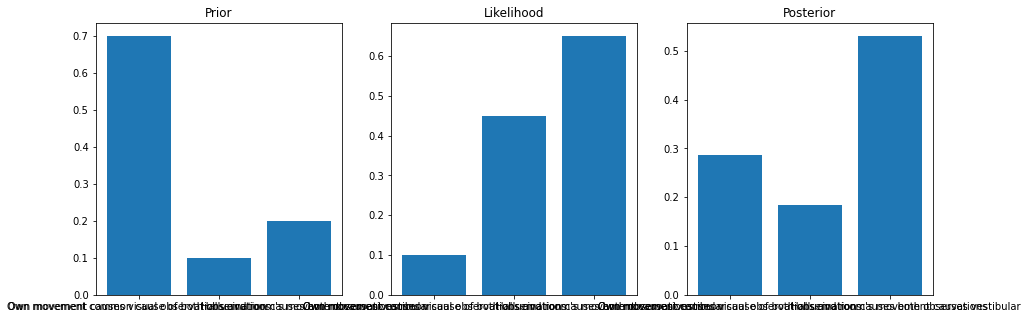

In [18]:
fig, ax = plt.subplots(1,3, figsize = (15,5))

scenarios = ['Own movement common cause of both observations', 
             'Own movement causes visual observations and room\'s movement causes vestibular', 
             'Hallucination causes both observations']
prior = np.array([7/10, 1/10, 2/10])

ax[0].bar(scenarios, prior)
ax[0].set_title('Prior')

likelihoods = np.array([1/10, 4.5/10, 6.5/10])
ax[1].bar(scenarios, likelihoods)
ax[1].set_title('Likelihood')

posteriors = np.array([i*j for i, j in zip(prior, likelihoods)])
posteriors /= np.sum(posteriors)
ax[2].bar(scenarios, posteriors)
ax[2].set_title('Posterior')

'''
Using the posterior probabilities, explain why you might vomit in this situation.

(answer here)


'''


# Case 3: Ambiguity Due to a Nuisance Parameter in ColorVision

We switch domains once again and apply a Bayesian approach to the central problem of color vision (Brainard and Freeman, 1997), simplified to a problem for grayscale surfaces. We see a surface when there is a light source. The surface absorbs some proportion of the incident photons and reflects the rest. Some of the reflected photons reach our retina.

## Step 1: Generative Model

The diagram of the generative model is: \
![gestalt-law-graphic](https://drive.google.com/uc?export=view&id=1TfQJAAPbN2AZirizhZPMvtiOMS2jRm7j) \

The ‘‘shade’’ of a surface is the grayscale in which a surface has been painted. Technically, shade is ‘‘reflectance,’’ the proportion of incident light that is reflected. Black paper might have a reflectance of 0.10, while white paper might have a reflectance of 0.90. The ‘‘intensity of a light source’’ (illuminant) is the amount of light it emits. Surface shade and light intensity are the world state variables relevant to this problem.

The sensory observation is the amount of light measured by the retina, which we will also refer to as retinal intensity. The retinal intensity can be calculated as follows:


> Retinal intensity = surface shade x light intensity 


In other words, if you make a surface twice as reflectant, it has the same effect on your retina as doubling the intensity of the light source.


## Step 2: Inference

Let’s take each of these numbers to be between 0 (representing black) and 1 (representing white). For example, if the surface shade is 0.5 (mid-level gray) and the light intensity is 0.2 (very dim light), then the retinal intensity is
 > 0.5 x 0.2 = 0.1.


**Task 6a:**

1. **Suppose your retinal intensity is 0.2. Suppose further that you hypothesize the light intensity to be 1 (very bright light). Under that hypothesis, calculate what the surface shade must have been.**

2. **Suppose your retinal intensity is the same 0.2. Suppose further that you hypothesize the light intensity to be 0.4. Under that hypothesis, calculate what the surface shade must have been.**

3. **Explain why the retinal intensity provides ambiguous infor- mation about surface shade.**



In [22]:
def compute_retinal_intensity(light_intensity, surface_shade):
  retinal_intensity = surface_shade * light_intensity 
  return retinal_intensity


retinal_intensity = 0.2 
light_intensity = 1 
surface_shade = 0.2
print(retinal_intensity == compute_retinal_intensity(light_intensity, surface_shade))

retinal_intensity = 0.2
light_intensity = 0.4
surface_shade = 0.5
print(retinal_intensity == compute_retinal_intensity(light_intensity, surface_shade))


'''
Explain why the retinal intensity provides ambiguous information about surface shade.

(answer here)

'''

True
True


'\nExplain why the retinal intensity provides ambiguous information about surface shade.\n\n(answer here)\n\n'

**Task 6b:**

1. **Suppose your retinal intensity is again 0.2. By going through a few more examples like the ones in (a) and (b), draw in the two-variable likelihood diagram in Figure 3 all combinations of hypothesized surface shade and hypoth- esized light intensity that could have produced your retinal intensity of 0.2. Think of this plot as a 3D plot (surface plot)!**

2. **Explain the statement : *The curve that we just drew represents the combinations of surface shade and light intensity that have a high likelihood***

3. **Suppose you have a strong prior that light intensity was between 0.2 and 0.4 and definitely nothing else. In the two- variable prior diagram in Figure 3 (center), shade the area corresponding to this prior.**

4. **In the two-variable posterior diagram in Figure 3 (right), indicate where the posterior probability is high.**


5. **What would you perceive according to the Bayesian theory?**





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app


'\n(6b.5)\nWhat would you perceive according to the Bayesian theory?\n\n(answer here)\n\n'

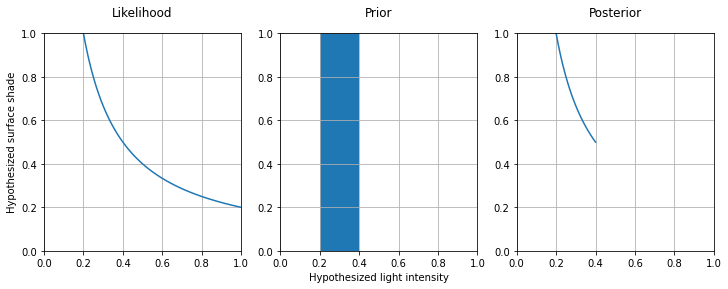

In [32]:
fig, ax = plt.subplots(1,3, figsize = (12,4)) 

for i, label in enumerate(['Likelihood', 'Prior', 'Posterior']):
  ax[i].grid()
  ax[i].set_xlim(0,1)
  ax[i].set_ylim(0,1)
  ax[i].set_title(label, y = 1.05)

  if i == 0: ax[i].set_ylabel('Hypothesized surface shade')
  if i == 1: ax[i].set_xlabel('Hypothesized light intensity')


#likelihood (6b.2; suppose retinal_intensity = 0.2)
hypothesized_surface_shade = np.linspace(0, 1, 101)
hypothesized_light_intensity = np.array([.2/i for i in hypothesized_surface_shade])
ax[0].plot(hypothesized_light_intensity, hypothesized_surface_shade)

#prior (6b.3)
ax[1].fill_betweenx(y = np.linspace(0, 1), x1 = 0.2, x2 = 0.4)

#posterior (6b.4)
ax[2].plot(hypothesized_surface_shade[20:41], hypothesized_light_intensity[20:41])


'''
(6b.5)
What would you perceive according to the Bayesian theory?

(answer here)

''' 

# Case 4: Inference under Measurement Noise in Sound Localization 


The previous cases featured categorically distinct scenarios. We
now consider a continuous estimation task—for example,
locating a sound on a line. This will allow us to introduce the
concept of noise in the internal measurement of the stimulus.
This case would be uninteresting without such noise.

## Step 1: Generative Model 


The stimulus is the location of the sound. The sensory observations generated by the sound location consist of a complex
pattern of auditory neural activity, but for the purpose of our
model, and reflecting common practice, we reduce the sensory observations to a single scalar, namely a noisy internal measurement x. The measurement lives in the same space as the stimulus itself—in this case, the real line.


For example, if the true location s of the sound is 3° to the right of straight ahead, then its measurement x could be 2.7° or 3.1°. 

Thus, the problem contains two variables: the stimulus s and
the observer’s measurement x. Each node in the graph is
associated with a probability distribution: the stimulus node
with a stimulus distribution $p(s)$ and the measurement node
with a measurement distribution $p(x \vert s)$ that depends on the
value of the stimulus. 

**Task 7a:**

**Please draw the generative model of the task and discuss what the nodes and relationships mean. Further make sure you understand the different kind of distributions: world-state, measurement, prior, likelihood, posterior, response distribution. Indicate whether they are objective or subjective.**

In [ ]:
generative_model = graphviz.Digraph(comment='Generative Model Sound Localization')

#nodes 
#generative_model.node('A', label = '', shape = 'circle')

#edges 
#generative_model.edges([['A'])


generative_model

In our example, say that the experimenter has programmed $p(s)$ to be Gaussian with a mean $\mu$
and variance $\sigma^2_s$. 

Thus the distribution of stimuli in the world follow the gaussian distribution: 
$$
p(s) = \frac{1}{\sqrt{2\pi \sigma^2_s}} e^{-\frac{(s-\mu)^2}{2\sigma^2_s}}
$$

Text(0.5, 0, 'Stimulus s')

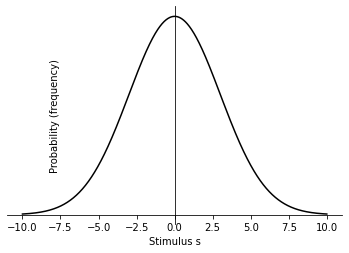

In [37]:
def gaussian(x, mu, sig):
    return 1./(np.sqrt(2.*np.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2.)/2)

''' 
A Gaussian distribution over the stimulus, p(s), 
reflecting the frequency of occurrence of each stimulus value in the world. 
This distribution is controlled by the experimenter, and thus is an objective 
probability. 
''' 
s = np.linspace(-10, 10, 1000)

mu = 0
sigma_s = 3

plt.plot(s, gaussian(s, mu = mu, sig = sigma_s), color = 'black'); 
#plt.annotate()
plt.yticks([])
ax = plt.gca(); ax.spines['top'].set_color('none'); ax.spines['left'].set_position('zero'); ax.spines['right'].set_color('none'); ax.spines['bottom'].set_position('zero')
ax.set_ylabel('Probability (frequency)', labelpad = 115)
ax.set_xlabel('Stimulus s')

In a particular trial of the experiment the subject experiences world state s as drawn by the experimenters world state distribution p(s). 

The ‘‘measurement distribution’’ is the distribution of the measurement x for a given stimulus value s. We make the common assumption that the measurement distribution is Gaussian:

$$
p(x \vert s) = \frac{1}{\sqrt{2\pi \sigma^2}} e^{-\frac{(x-s)^2}{2\sigma^2}}
$$

where $\sigma$ is the standard deviation of the measurement noise, also called *measurement noise level* or *sensory noise level*. This Gaussian distribution is shown in Figure 4B. The higher $\sigma$, the noisier the measurement and the wider its distribution. The Gaussian assumption can be justified using the Central Limit Theorem.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


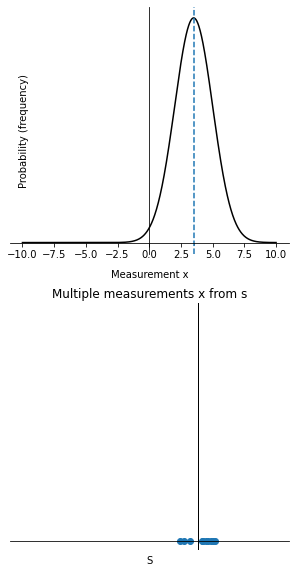

In [38]:
''' 
Suppose we now fix a particular value of s (the dotted line). 
Then, the measurements x will follow a Gaussian distribution around that s. 
The diagram at the bottom shows a few samples of x, 
which are scattered around the true sound location s, indicated by the arrow.
''' 

fig, ax = plt.subplots(2,1, figsize = (5,10))

x = np.linspace(-10, 10, 1000)


#s_sampled = np.random.normal(mu, sigma_s)
s_sampled = 3.5

mu = 0
sigma_s = 1.5

ax[0].plot(x, gaussian(x, mu = s_sampled, sig = sigma_s), color = 'black'); 
ax[0].axvline(s_sampled, ls = '--')
#plt.annotate()
ax[0].set_xticks([s_sampled], ['s'])
ax[0].set_yticks([])
ax[0].set_ylabel('Probability (frequency)', labelpad = 120)
ax[0].set_xlabel('Measurement x', labelpad = 10)
ax[0].spines['top'].set_color('none'); ax[0].spines['left'].set_position('zero'); ax[0].spines['right'].set_color('none'); ax[0].spines['bottom'].set_position('zero')

ax[1].axvline(s_sampled, color = 'black', lw = 1)
s_sampled = np.random.normal(s_sampled, sigma_s, 10)

ax[1].scatter(s_sampled, np.zeros_like(s_sampled))
#plt.annotate()
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_xlim(-10,10)
ax[1].set_ylim(-0.01,0.25)
ax[1].set_xlabel('S', labelpad = 15)
ax[1].set_title('Multiple measurements x from s')

ax = ax[1]; ax.spines['top'].set_color('none'); ax.spines['left'].set_visible(False); ax.spines['right'].set_color('none'); ax.spines['bottom'].set_position('zero')


## Step 2a: Inference 


### The Likelihood Function 
On a given trial, the observer makes a measurement $x_{trial}$. The inference problem is: what stimulus estimate should the observer make?

We introduced the stimulus distribution $p(s)$, which reflects how often each stimulus value tends to occur in the experiment. Suppose that the observer has learned this distribution through training. 

Then, the observer will already have an expectation about the stimulus before it even appears. This expectation constitutes prior knowledge, and, therefore, in the inference process, p(s) is referred to as the *prior distribution* (Figure 5A). Unlike the stimulus distribution in the generative model, the prior distribution reflects the observer’s beliefs and is thus a subjective probability.  

The likelihood function represents the observer’s belief about the stimulus based on the measurement only absent any prior knowledge. Formally, the likelihood is the probability of the observed measurement under a hypothesized stimulus:

$$
L(s) = p(x_{trial} \vert s)
$$

As stated in Section 2.2, the likelihood function is a function of s, not of x. The x variable is now fixed to the observed value $x_{trial}$. Under our assumption for the measurement distribution $p(x \vert s)$, the likelihood function over the stimulus is

$$
L(s) = \frac{1}{\sqrt{2\pi \sigma^2}} e^{-\frac{(x-s)^2}{2\sigma^2}}
$$


(Although this particular likelihood is normalized over s, that is not generally true. This is why the likelihood function is called a function and not a distribution.) The width of the likelihood function is interpreted as the observer’s level of uncertainty based on the measurements alone.


### The Posterior Distribution
The posterior distribution is $p(s\vert x_{trial)}$, the probability density function over the stimulus variable s given the measurement $x_{trial}$. We rewrite Bayes’ rule as

$$
p(s \vert x_{trial}) \propto p(x_{trial} \vert s) p(s) = L(s)p(s) 
$$

**Task 7b**
1. **Why can we get away with the proportionality sign?**

The previous equation assigns a probability to each possible hypothesized value of the unknown stimulus s. We will now compute the posterior distributions under the assumptions we made in step 1.

Upon substituting the expressions for $L(s)$ and $p(s)$ into the equation, we 
see that in order to compute the posterior, we need to compute the product of two Gaussian functions. 

![gestalt-law-graphic](https://drive.google.com/uc?export=view&id=1NohtyJgMn7GDwtnAkCoxH9cBx2TadRHF) \

2. **Create a figure similar to the figure above through numerical computation of the posterior. Numerically normalize prior, likelihood, and posterior.**

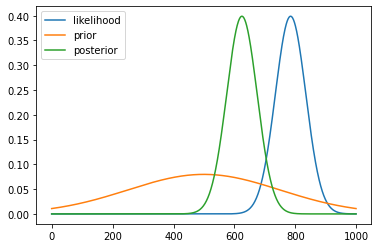

In [46]:
''' 
Create the figure through numerical computation
''' 

def gaussian(x, mu, sig):
    return 1./(np.sqrt(2.*np.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2.)/2)

x = np.linspace(-10, 10, 1000)

likelihood = plt.plot(gaussian(x, 5.7, 1), label='likelihood')
prior = plt.plot(gaussian(x, 0, 5), label='prior')
posterior = plt.plot(gaussian(x, 2.5, 1), label='posterior')


#
# plt.xlim(-10, 10)
plt.legend()
plt.show()


# Exploring the Inference 

You can compare your solution of the previous exercise with this one, and consider the effect of different $\mu$ and $
\sigma$ on the inference. 

**Task 7c**

Let’s consider the following questions using the following interactive demo:

* **For a Gaussian posterior, explain how the information seems to be combining. (Hint: think about the prior exercises!)**
* **What is the difference between the posterior here and the Gaussian that represented the average of two Gaussians in the exercise above?**
* **How should we think about the relative weighting of information between the prior and posterior?**


In [ ]:
# @title Helper Functions (Please execute)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt 
import ipywidgets as widgets
from IPython.display import clear_output
from ipywidgets import FloatSlider, Dropdown, interactive_output
from ipywidgets import interact, fixed, HBox, Layout, VBox, interactive, Label

def gaussian(x, μ, σ):
    """ Compute Gaussian probability density function for given value of the
    random variable, mean, and standard deviation

    Args:
      x (scalar): value of random variable
      μ (scalar): mean of Gaussian
      σ (scalar): standard deviation of Gaussian

    Returns:
      scalar: value of probability density function
    """
    return np.exp(-((x - μ) / σ)**2 / 2) / np.sqrt(2 * np.pi * σ**2)

def product_guassian(mu1, mu2, sigma1, sigma2):
    J_1, J_2 = 1/sigma1**2, 1/sigma2**2
    J_3 = J_1 + J_2
    mu_prod = (J_1*mu1/J_3) + (J_2*mu2/J_3)
    sigma_prod = np.sqrt(1/J_3)
    return mu_prod, sigma_prod

def plot_bayes(mu1, mu2, sigma1, sigma2):
    x = np.linspace(-7, 7, 1000, endpoint=True)
    prior = gaussian(x, mu1, sigma1)
    likelihood = gaussian(x, mu2, sigma2)

    mu_post, sigma_post = product_guassian(mu1, mu2, sigma1, sigma2)
    posterior = gaussian(x, mu_post, sigma_post)

    plt.figure(figsize=(8, 6))
    plt.plot(x, prior, c='b', label='prior')
    plt.fill_between(x, prior, color='b', alpha=0.2)
    plt.plot(x, likelihood, c='r', label='likelihood')
    plt.fill_between(x, likelihood, color='r', alpha=0.2)
    plt.plot(x, posterior, c='k', label='posterior')
    plt.fill_between(x, posterior, color='k', alpha=0.2)
    plt.yticks([])
    plt.legend(loc="upper left")
    plt.ylabel('$\mathcal{N}(x, \mu, \sigma^2)$')
    plt.xlabel('x')
    plt.show()


def calc_mean_mode_median(x, y):
    """

    """
    pdf = y * (x[1] - x[0])
    # Calc mode of an arbitrary function
    mode = x[np.argmax(pdf)]

    # Calc mean of an arbitrary function
    mean = np.multiply(x, pdf).sum()

    # Calc median of an arbitrary function
    cdf = np.cumsum(pdf)
    idx = np.argmin(np.abs(cdf - 0.5))
    median = x[idx]

    return mean, median, mode

In [ ]:
mu1_slider = FloatSlider(min=-4.0, max=4.0, step=0.01, value=-0.5, description="µ_prior", continuous_update=True)
mu2_slider = FloatSlider(min=-4.0, max=4.0, step=0.01, value=0.5, description="µ_likelihood", continuous_update=True)
sigma1_slider = FloatSlider(min=0.1, max=2.0, step=0.01, value=0.5, description="σ_prior", continuous_update=True)
sigma2_slider = FloatSlider(min=0.1, max=2.0, step=0.01, value=0.5, description="σ_likelihood", continuous_update=True)
distro1_label = Label(value="prior distribution", layout=Layout(display="flex", justify_content="center"))
distro2_label = Label(value="likelihood distribution", layout=Layout(display="flex", justify_content="center"))

widget_ui = HBox([VBox([distro1_label, mu1_slider, sigma1_slider]),
                  VBox([distro2_label, mu2_slider, sigma2_slider])])

widget_out = interactive_output(plot_bayes, {'mu1': mu1_slider,
                                            'mu2': mu2_slider,
                                            'sigma1': sigma1_slider,
                                            'sigma2': sigma2_slider})
display(widget_ui, widget_out)

Output()

## Step 2b: The Stimulus Estimate (response)

We now estimate $s$ on the trial under consideration. We denote the estimate by $\hat{s}$. As mentioned in Section 2.3, for a real-valued variable and a squared error loss function, the observer should use the mean of the posterior as the estimate.

Thus,
$$
\hat{s} = \mu_{posterior} = \frac{\frac{x_{trial}}{\sigma^2} + \frac{\mu}{\sigma_s^2}}{\frac{1}{\sigma^2} + \frac{1}{\sigma^2_s}}
$$

This would be Bayesian observer's response in this localization task. 

## Step 3: Response Distribution

We now like to use this model to predict subjects’ behavior in this experiment. To do so, we’d like to compare our predicted responses, $\hat{s}$, to the subject’s actual responses. Looking for $\hat{s}$, we note that, to compute a predicted response on a given trial, we need to know $x_{trial}$. But this is something we don’t know! $x_{trial}$ is the noisy measurement made by the observer’s sensory system, an internal variable to which an experimenter has no access.


A common mistake in Bayesian modeling is to discuss the likelihood function (or the posterior distribution) as if it were a single, specific function in a given experimental condition. In the presence of noise in the observation/measurement, this is incorrect. Both the likelihood and the posterior depend on the measurement xtrial, which itself is randomly generated on each trial, and, therefore, the likelihood and posterior will ‘‘wiggle around’’ from trial to trial. 

This variability propagates to the estimate: the estimate $s$ also depends on the noisy measurement $x_{trial}$. Since $x_{trial}$ varies from trial to trial, so does the estimate: the stochasticity in the estimate is inherited from the stochasticity in the measurement $x_{trial}$. Hence, in response to repeated presentations of the same stimulus, the estimate will be a random variable with a probability distribution, which we will denote by $p(\hat{s} \vert s)$. 

So rather than comparing our model’s predicted responses to subjects’ actual responses on individual trials, we’ll instead use our model to predict the distribution over subjects’ responses for a given value of the stimulus. The predicted distribution is precisely $p(\hat{s}\vert s)$. To compare our Bayesian model with an observer’s behavior, we thus need to calculate this distribution.

**Task 8** \
**Simulate the response distribution for 10 trials for the same stimulus s. How is it different from 
the posterior?**

In [ ]:
response = []

# draw a stimulus from the world-state distribution p(s)

for i in range():
  
  # obtain measurement x_trial from the measurement distribution. 

  # compute the posterior using the prior p(s) and the likelihood L(s)

  # take the mean of the posterior as your final response 

  pass 

We see that the variance of the estimate can be different from the variance of the posterior. Intuitively, the response distribution (the distribution of the observer’s posterior mean estimate) for a given true stimulus $s$ reflects the variability of behavioral responses we would find when repeatedly pre- senting the same stimulus $s$ many times. This is conceptually distinct from the internal uncertainty of the observer on a single given trial, which is not directly measurable. Because of a strong prior, a Bayesian observer could have consistent responses from trial to trial despite being very internally uncertain on any particular trial. This completes the model: the distribution $p(\hat{s} \vert s)$ can now be compared to human behavior.